#Install Dependencies

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Reading in Data

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]


#Inspecting Data

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Finding out more about test and train datasets

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

We find Categorical, Ordinal and Numeric data in the above step:

Categorical: Survived, Sex, and Embarked, PClass

Numeric: Age, Fare, SibSp, Parch

PClass is ordinal and SibSp, Parch are Discrete while Age and Fare are Continuous.


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 total samples
38% of train data survived.

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Foo, Mr. Choong",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Names are unique but most likely not required for the algorithm.

Several duplicate cabin values

3 possible values for embarked (S,Q,C)

Ticket values are repeated since only 681 are unique.

### Finding out the percentage of data that survived based on values in that column

#### Class seems important to survival

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### More females survived compared to males

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### No direct correlation found and thus a total count of family memebers maybe created as a new feature

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#### Parch and SibSp can be merged to create new feature

In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### A lot of children survived.
#### Old people survived
#### Young people between 15-30 died.

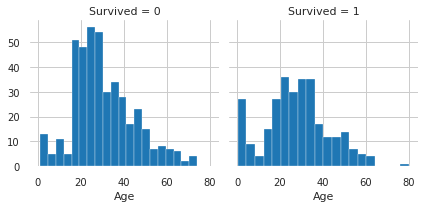

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### More passengers in Pclass 1 survived
#### Children and babies in Class 2 and 3 survived

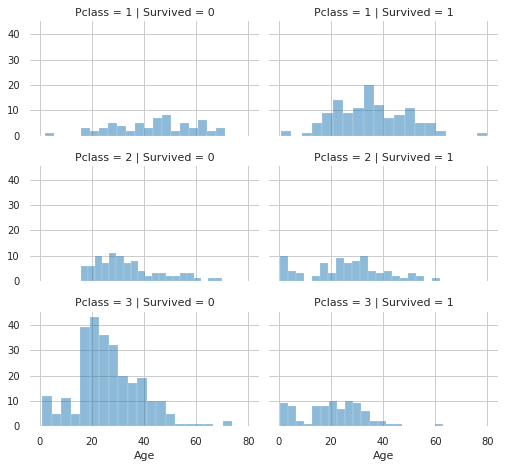

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### More females survived for embarked S and Q whereas more males survived for embarked C

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


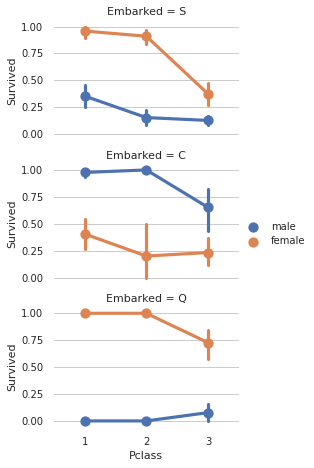

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

#### Higher the fare, better the survival rate

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


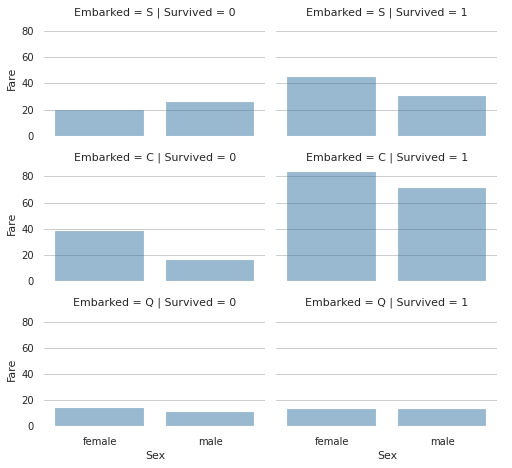

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Processing Data

#### We find that Ticket might not be correlated to survival and can be safely dropped.

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Title Column

#### Figuring out if the title of a person correlates to better survival rate

In [ ]:
# use regex to find the title of the person in the Name column
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# find frequency of each title
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Replace titles with Master, Mr, Mrs, Miss or Rare to make it easier to analyze

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


#### Convert title to numeric values to make it even easier

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


#### Drop name and passengerId since they are not relevant to survival rate

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Sex Column

#### Convert 'male' and 'female' to 0 and 1 respectively

In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Age Column

#### Try to fill in missing age values

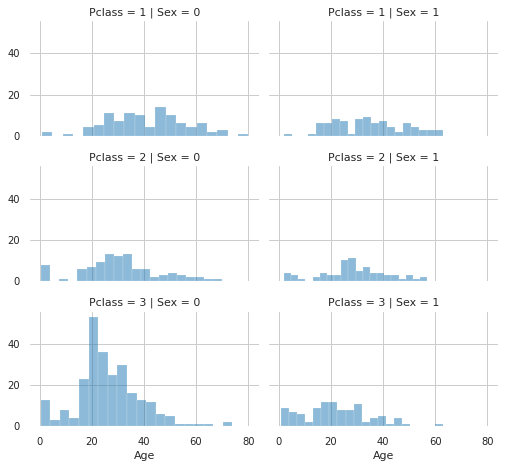

In [ ]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

#### We can use random numbers between the mean and standard dev for each class and gender combination as seen in above graph to fill in missing age values

In [ ]:
# Create array of 6 values as there are 6 different possibilities
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# iterate over Sex and Pclass using a nested for loop
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


#### Creating ranges for ages based on which survived

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


##### Replace Age with values 0,1,2,3 for respective AgeBand

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


#### Drop age band column


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### SibSp and Parch Column

#### Use SibSp and Parch to create a new feature called FamilySize

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


#### Create a feature called isAlone
#### Set isAlone to 1 and 0 if otherwise

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### Drop Parch, SibSp and FamilySize

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Create new feature using product of Age and Class

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Embarked Column

#### Fill in missing Embarked values with most common occurance

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Convert Embarked to numeric values

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Fare Column


#### Fill in missing fare values using median of Fare

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


#### Create FareBand (Continuous ranges)

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


#### Replace fare with 0, 1, 2, 3 for respective FareBand

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

In [ ]:
test_df.head(10)

# Create X_train, Y_train and X_test

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Create Y_test

In [ ]:
Y_test = pd.read_csv('./gender_submission.csv')
Y_test.drop('PassengerId', axis = 1, inplace=True)
Y_test.columns

Index(['Survived'], dtype='object')

# Machine Learning

## Logistic Regression

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(Y_test,lr_predict))

confussion matrix
[[260   6]
 [  9 143]]


Accuracy of Logistic Regression: 96.41148325358851 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Fare,0.397888
2,Age,0.287011
4,Parch,0.261473
6,Embarked,0.126553
3,SibSp,-0.086655
7,Title,-0.311069
0,Pclass,-0.750700


## Naive Bayes Classifier

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,Y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(Y_test, nbpred)
nb_acc_score = accuracy_score(Y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(Y_test,nbpred))

confussion matrix
[[174  92]
 [  1 151]]


Accuracy of Naive Bayes model: 77.75119617224881 

              precision    recall  f1-score   support

           0       0.99      0.65      0.79       266
           1       0.62      0.99      0.76       152

    accuracy                           0.78       418
   macro avg       0.81      0.82      0.78       418
weighted avg       0.86      0.78      0.78       418



## Random Forest

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=50, random_state=12,max_depth=3)
rf.fit(X_train,Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(Y_test,rf_predicted))

confussion matrix
[[260   6]
 [  1 151]]


Accuracy of Random Forest: 98.32535885167464 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.96      0.99      0.98       152

    accuracy                           0.98       418
   macro avg       0.98      0.99      0.98       418
weighted avg       0.98      0.98      0.98       418



## KNN

In [ ]:
#Find best number of neighbors
l = []
k = []
for i in range(1,50):  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  knn_predicted = knn.predict(X_test)
  knn_conf_matrix = confusion_matrix(Y_test, knn_predicted)
  knn_acc_score = accuracy_score(Y_test, knn_predicted)
  l.append(knn_acc_score)
  k.append(i)

Text(0, 0.5, 'Accuracy')

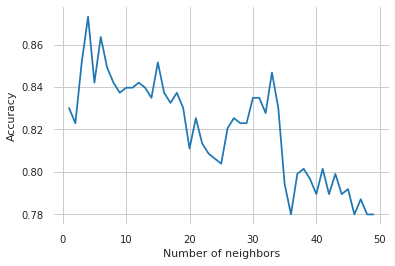

In [ ]:
plt.plot(k, l)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=l.index((max(l))) + 1)
knn.fit(X_train, Y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(Y_test, knn_predicted)
knn_acc_score = accuracy_score(Y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(Y_test,knn_predicted))

confussion matrix
[[251  15]
 [ 38 114]]


Accuracy of K-NeighborsClassifier: 87.32057416267942 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       266
           1       0.88      0.75      0.81       152

    accuracy                           0.87       418
   macro avg       0.88      0.85      0.86       418
weighted avg       0.87      0.87      0.87       418



In [ ]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 3)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(Y_test,dt_predicted))

confussion matrix
[[248  18]
 [  5 147]]


Accuracy of DecisionTreeClassifier: 94.49760765550239 

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       266
           1       0.89      0.97      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418



In [ ]:
m6 = 'Support Vector Classifier'
svc =  SVC(C=10)
svc.fit(X_train, Y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(Y_test, svc_predicted)
svc_acc_score = accuracy_score(Y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(Y_test,svc_predicted))

confussion matrix
[[261   5]
 [  0 152]]


Accuracy of Support Vector Classifier: 98.80382775119617 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.97      1.00      0.98       152

    accuracy                           0.99       418
   macro avg       0.98      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [ ]:
m6 = 'Stochastic Gradient Descent'
sgd =  SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_predicted = sgd.predict(X_test)
sgd_conf_matrix = confusion_matrix(Y_test, sgd_predicted)
sgd_acc_score = accuracy_score(Y_test, sgd_predicted)
print("confussion matrix")
print(sgd_conf_matrix)
print("\n")
print("Accuracy of Stochastic Gradient Descent:",sgd_acc_score*100,'\n')
print(classification_report(Y_test,sgd_predicted))

confussion matrix
[[245  21]
 [  3 149]]


Accuracy of Stochastic Gradient Descent: 94.25837320574163 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       266
           1       0.88      0.98      0.93       152

    accuracy                           0.94       418
   macro avg       0.93      0.95      0.94       418
weighted avg       0.95      0.94      0.94       418



# Evaluation

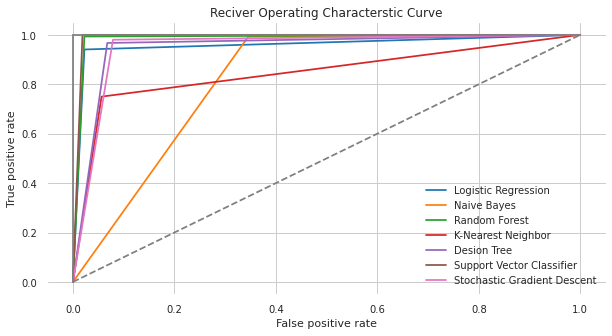

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(Y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(Y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(Y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(Y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(Y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(Y_test,svc_predicted)
sgd_false_positive_rate,sgd_true_positive_rate,svc_threshold = roc_curve(Y_test,sgd_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(sgd_false_positive_rate,sgd_true_positive_rate,label='Stochastic Gradient Descent')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()


In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','K-Nearest Neighbour',
                                   'Decision Tree','Support Vector Machine', 'SGD'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, sgd_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,96.411483
1,Naive Bayes,77.751196
2,Random Forest,98.325359
3,K-Nearest Neighbour,87.320574
4,Decision Tree,94.497608
5,Support Vector Machine,98.803828
6,SGD,94.258373


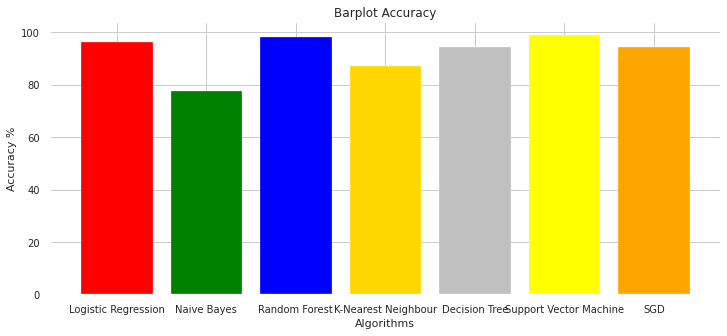

In [ ]:
colors = ['red','green','blue','gold','silver','yellow', 'orange']
plt.figure(figsize=(12,5))
plt.title("Barplot Accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)
estimators = [
     ('lr',LogisticRegression())]
clf = StackingClassifier(estimators=estimators, final_estimator=SVC(C=1))

clf.fit(X_train, Y_train).score(X_test, Y_test)

0.9210526315789473

# KNN Homework using Cross validation

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.75977654 0.76404494 0.79775281 0.78651685 0.83146067]
0.7879103634423451


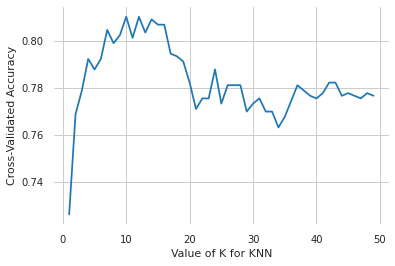

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 50)
k_scores = []
# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()